In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns

# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

Columns: ['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean'
 'area_mean' 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32'] 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null f

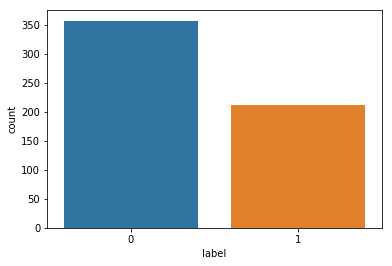

In [19]:
df = pd.read_csv('data.csv')
print('Columns:', df.columns.values, '\n')
df.drop("id", axis=1, inplace=True)
print(df.info(), '\n')
'''
    df.info() shows that the 'Unnamed: 32' column has 0 non-null values, which means that all the values in that
    column are null values. Hence, we will drop that column
'''
df.drop("Unnamed: 32", axis=1, inplace=True) 
df['label'] = df['diagnosis'].map({'M':1, 'B': 0})

# this plot tells us that there are more cases of the tumour being Benign than Malignant
sns.countplot(df['label'],label="Count") 

X = np.array(df.drop(['label', 'diagnosis'], axis=1))
y = np.array(df['label'])
print('dataframe shape:',df.shape, '\nFeatures dimensions:', X.shape, '\nLabels dimensions:', y.shape)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(455, 30) (455,) (114, 30) (114,)


In [21]:
# create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# train the model using the training sets
clf.fit(X_train, y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

print(y_pred)

[0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]


In [22]:
# model Accuracy: how often is the classifier correct?
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9473684210526315
